#### Step1:___Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import math
import scipy
from scipy import stats

#### Step2:___Load Dataset

In [34]:
file_path = "VMK.csv"
data = pd.read_csv(file_path)

In [ ]:
data.shape

#### Step3:___Inspect Dataset

In [ ]:
data.info()
data.describe()

#### Step4:___Handling missing

In [ ]:
pd.isnull(data).sum()                                            #check missing value

In [ ]:
data = data.dropna(subset=["Itches", "Burns", "AGE"])            #Drop rows with missing values

In [ ]:
data["Fever"]= data["Fever"].fillna("unknown")                   #Fill missing values in less critical columns

In [ ]:
pd.isnull(data).sum()                                            #Verify for missing

#### Step5:___Remove Duplicates

In [ ]:
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")

In [ ]:
data = data.drop_duplicates()                                          #Drop duplicates

In [ ]:
print(f"Number of Duplicates Remaining: {data.duplicated().sum()}")    #Verify duplicates removed

#### Step6:___Fixing Datatypes

In [ ]:
data["AGE"] = pd.to_numeric(data["AGE"],errors="coerce")
data["Sex frequency"] = pd.to_numeric(data["Sex frequency"],errors="coerce")

# DateType
data["Start_Date"] = pd.to_datetime(data["Start_Date"],errors="coerce")

print("\nUpdated Data Types:")
print(data.dtypes)

#### Step7:___Detecting & Handling Outliers

In [ ]:
                                         #outliers
q1 = data["AGE"].quantile(0.25)
q3 = data["AGE"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
                                         #Filter outliers
                                        
data1 = data[(data["AGE"] >= lower_bound) & (data["AGE"] <=upper_bound)]
print("nOutliers Removed")

#### Step8:___Renaming columns

In [ ]:
data.rename(columns= {'Fever': 'Febrille', 'Relationship': 'Partnerr'})

In [ ]:
# Change text type
print(data['Name'].str.upper())
print(data['Occupation'].str.lower())
print(data['Position'].str.title())

#### Step8:___Save cleaned data

In [ ]:
Cleaned_data = "cleaned_dataset.csv"
data.to_csv(Cleaned_data, index=False)

print(f"\nCleaned dataset saved to: {Cleaned_data}")

### Barchart using matplotlib

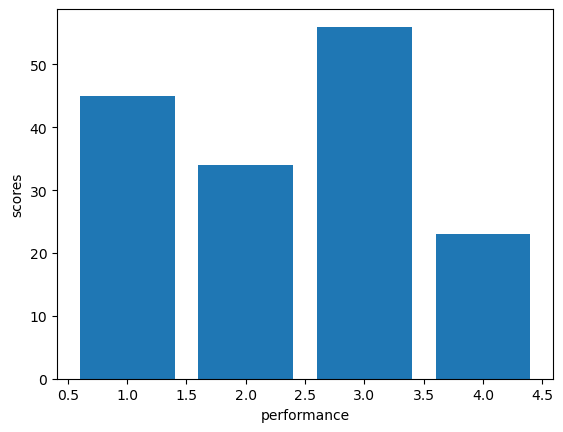

In [6]:
import matplotlib.pyplot as pyplot
labels = ('first', 'second', 'third', 'fourth')
index = (1,2,3,4)
sizes = [45,34,56,23]
pyplot.bar(index, sizes, label=labels)

pyplot.ylabel('scores')
pyplot.xlabel('performance')

pyplot.show()

### Coloured Barchart

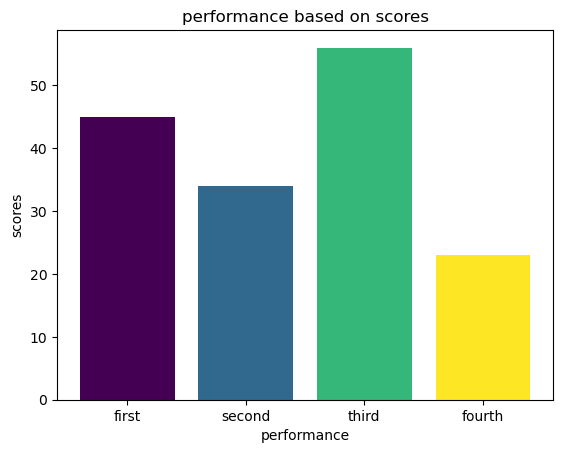

In [9]:
import matplotlib.pyplot as plt
import numpy as np

categories = ('first', 'second', 'third', 'fourth')
values = [45,34,56,23]

colors = plt.cm.viridis(np.linspace(0,1,len(categories)))
plt.bar(categories, values, color=colors)

plt.ylabel('scores')
plt.xlabel('performance')
plt.title('performance based on scores')

plt.show()

In [ ]:
### Pie chart

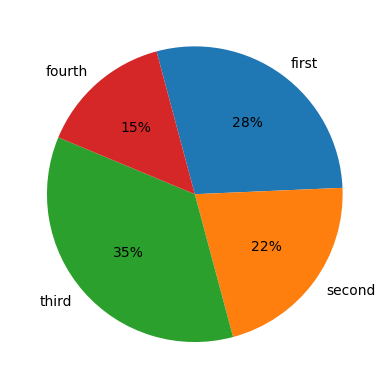

In [11]:
import matplotlib.pyplot as pyplot

labels = ('first', 'second', 'third', 'fourth')
sizes = [45,34,56,23]

pyplot.pie(sizes, labels=labels, autopct='%1.f%%', counterclock=False, startangle=105)

pyplot.show()

### Donut Chart 

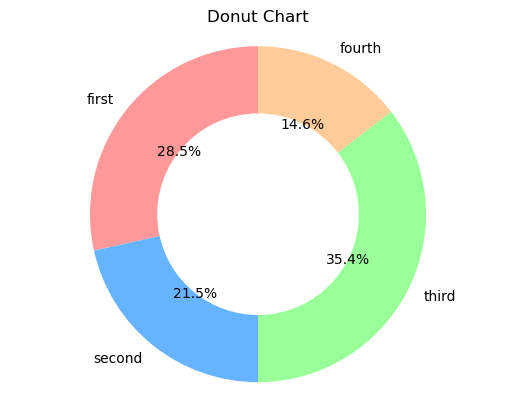

In [31]:
import matplotlib.pyplot as plt

labels = ['first', 'second', 'third', 'fourth']
sizes = [45,34,56,23]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
ax.axis('equal')
plt.title('Donut Chart')

plt.show()

In [ ]:
### Basic Histogram

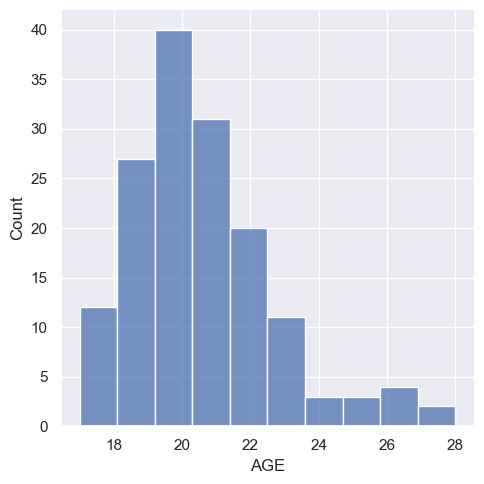

In [37]:
import seaborn as sns
sns.set_theme()
sns.displot(data, x="AGE")

### KDE Plot

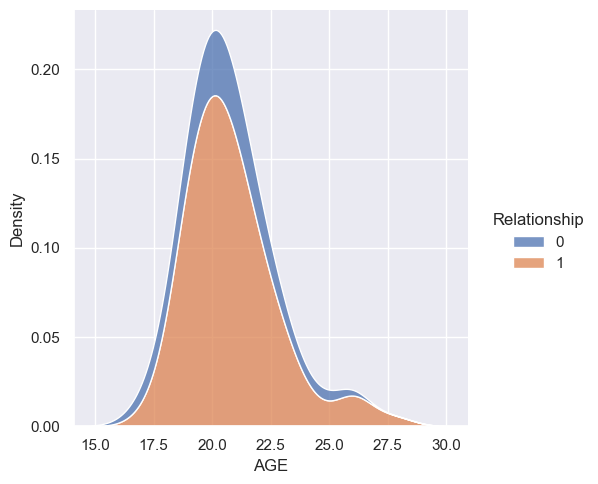

In [40]:
import seaborn as sns
sns.set_theme()
sns.displot(data, x="AGE", hue="Relationship", kind="kde", multiple="stack")


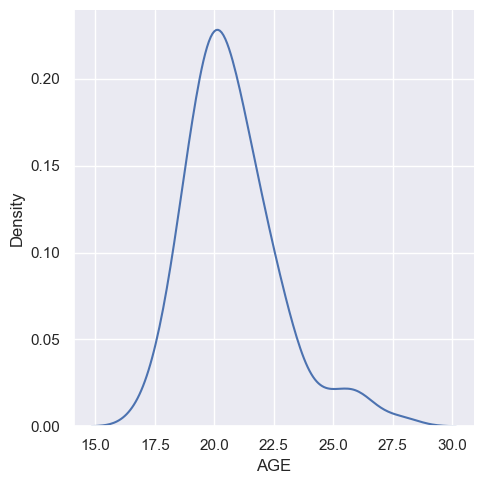

In [41]:
import seaborn as sns
sns.set_theme()
sns.displot(data, x="AGE", kind="kde")

### Scatter plot

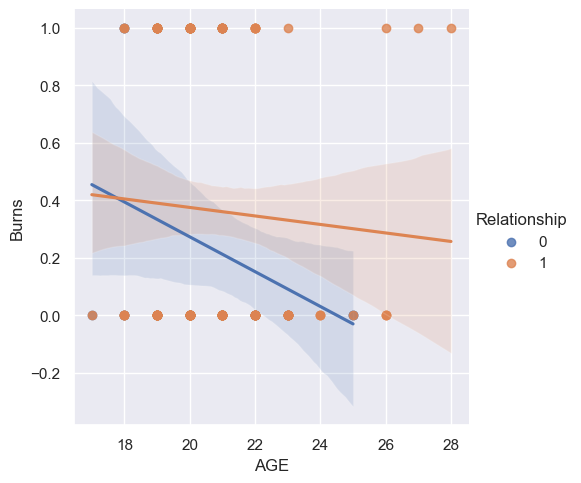

In [43]:
import seaborn as sns
sns.set_theme()
sns.lmplot(x="AGE", y="Burns", hue="Relationship", data=data)

### Violin Plot

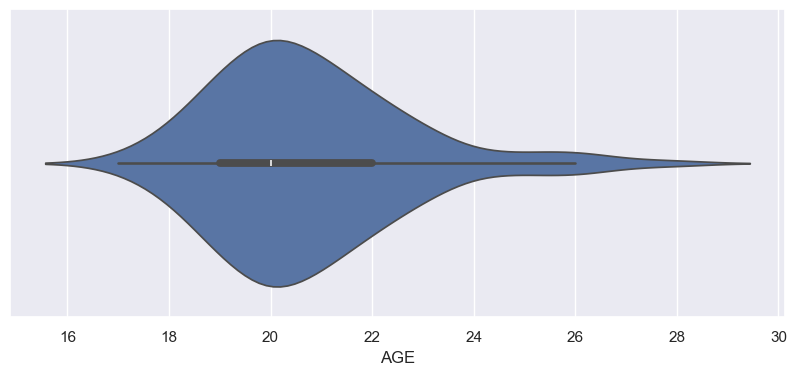

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.violinplot(x=data["AGE"])
plt.show()


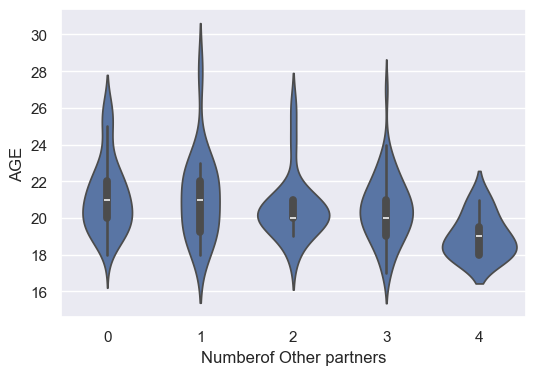

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.violinplot(x="Numberof Other partners", y="AGE", data=data)
plt.show()
